In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating our dataset

In [18]:
mean = [4,2]
cov = [[1,  -0.5],
       [-0.5, 1]]
dist = np.random.multivariate_normal(mean, cov, 500)

print(dist.shape)

(500, 2)


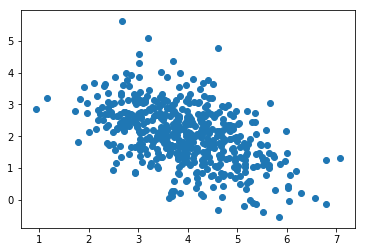

In [19]:
plt.figure()
plt.scatter(dist[:,0], dist[:,1])
plt.show()

In [29]:
mean_01 = [4,2]
cov_01 = [[1,  0.5],
         [0.5, 1]]
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)

mean_02 = [1,3]
cov_02 = [[1.3,  -0.3],
         [-0.3, 1.5]]
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


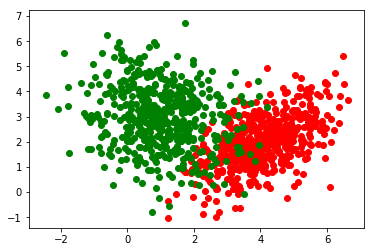

In [30]:
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], color='red')
plt.scatter(dist_02[:,0], dist_02[:,1], color='green')
# plt.scatter(2.3, 2, color='black', marker='*', s=300)
plt.show()

In [52]:
rows = dist_01.shape[0] + dist_02.shape[0]
columns = dist_01.shape[1] + 1 # extra columns for labels

dataset = np.zeros((rows, columns))
dataset.shape

(1000, 3)

In [53]:
dataset[:dist_01.shape[0], :-1] = dist_01
dataset[dist_01.shape[0]:, :-1] = dist_02

# Assigning labels
dataset[:dist_01.shape[0], -1] = 0 # Redundant
dataset[dist_01.shape[0]:, -1] = 1

In [54]:
# dataset[490:510]

In [55]:
# Shuffling the dataset
np.random.shuffle(dataset)

In [49]:
# dataset[490:510]

#### Splitting into training and testing datasets

In [47]:
split = int(0.8 * dataset.shape[0])

X_train = dataset[:split, :-1]
X_test = dataset[split:, :-1]

y_train = dataset[:split, -1]
y_test = dataset[split:, -1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 2) (800,) (200, 2) (200,)


# K Nearest Neighbors 

### kNN Problem Statement

In [81]:
TP = np.array([-1.5, 5.2])

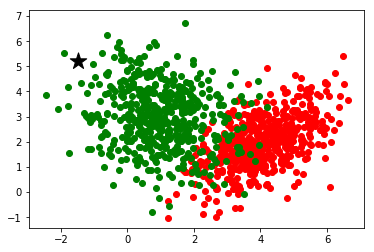

In [82]:
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], color='red')
plt.scatter(dist_02[:,0], dist_02[:,1], color='green')
plt.scatter(TP[0], TP[1], color='black', marker='*', s=300)
plt.show()

### Implementing kNN

In [58]:
def euclidean(a1, a2):
    return np.sqrt(np.sum((a1 - a2) ** 2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [60]:
X_train[0], y_train[0]

(array([4.15465529, 1.97719464]), 0.0)

In [62]:
# l1 = [1,2,3,4]
# l2 = [10,22,33,44]
# for i,j in zip(l1,l2):
#     print(i,j)
    
# print('-' * 20)

# for i in range(len(l1)):
#     print(l1[i], l2[i])
    
    
# Sorting list in python
# a = [1,2,3,4,5]
# >>> sorted(a, reverse=True)
# [5, 4, 3, 2, 1]
# >>> a
# [1, 2, 3, 4, 5]
# >>> 
# >>> a.sort(reverse=True) # Inplace
# >>> a
# [5, 4, 3, 2, 1]


In [64]:
def knn(X_train, y_train, test_point, k=5):
    
    distances = []
    
#     for i in range(X_train.shape[0]):
#         data_point = X_train[i]
#         label = y_train[i]

    # 1) Compute distances
    for data_point, label in zip(X_train, y_train):
        distance = euclidean(test_point, data_point)
        distances.append((distance, label))
        
    # 2) Sort
    distances = sorted(distances, key=lambda x: x[0])
    
    # 3) Choose k nearest neighbors
    k_nearest_neighbors = np.array(distances[:k])  
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    
    # 4) Decide (Majority Voting)
    verdict = labels[counts.argmax()]
    return verdict

In [83]:
knn(X_train, y_train, TP)

1.0

In [85]:
def get_predictions(X_train, y_train, X_test, k=5):
    predictions = []
    
    for test_point in X_test:
        pred = knn(X_train, y_train, test_point, k)
        predictions.append(pred)
        
    return np.array(predictions)

In [86]:
def calculate_accuracy(predictions, true_labels):
    return (predictions == true_labels).sum() / true_labels.shape[0]

In [87]:
predictions = get_predictions(X_train, y_train, X_test)
calculate_accuracy(predictions, y_test)

0.925

# KNN on MNIST

In [89]:
import pandas as pd
dataset = pd.read_csv("/Users/Pratulya/Desktop/machine-learning/bootcamp/mnist_data/train.csv")

In [90]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data = dataset.values[:5000]
data.shape

(5000, 785)

In [92]:
X, y = data[:, 1:], data[:, 0]

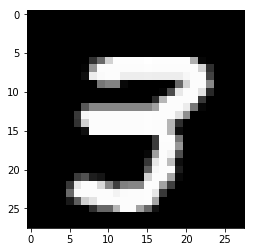

In [116]:
# Plotting digit
im = X[2000].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')

In [117]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# print(y_train)
# print(y_test)

(4000, 784) (4000,)
(1000, 784) (1000,)


In [96]:
predictions = get_predictions(X_train, y_train, X_test, k=5)
calculate_accuracy(predictions, y_test)

0.928

In [97]:
test_df = pd.read_csv("/Users/Pratulya/Desktop/machine-learning/bootcamp/mnist_data/test.csv")

In [98]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

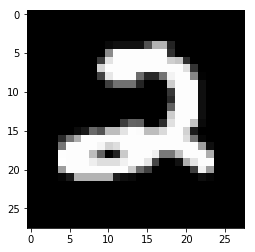

Label: 2.0


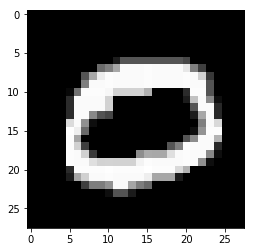

Label: 0.0


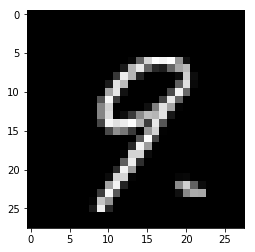

Label: 9.0


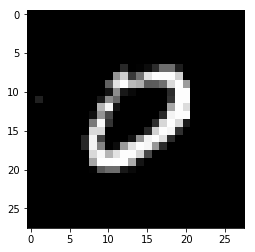

Label: 9.0


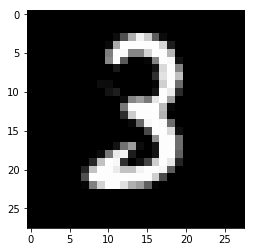

Label: 3.0


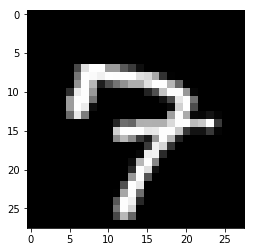

Label: 7.0


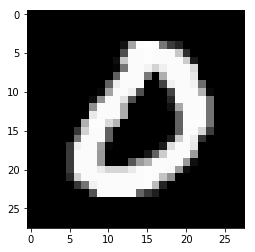

Label: 0.0


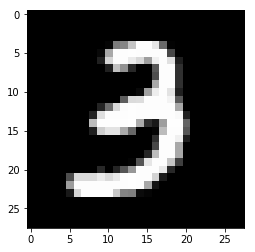

Label: 3.0


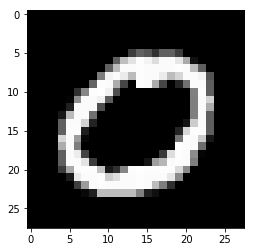

Label: 0.0


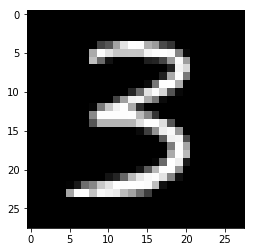

Label: 3.0


In [101]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test))

# Sklearn KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn_sk = KNeighborsClassifier(n_neighbors=5) # p=1 Manhattan  p=2 Euclidean

In [112]:
knn_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [113]:
knn_sk.score(X_test, y_test) # On MNIST

0.928